# Árboles de decisión

es un árbol de clasificación binaria (como los árboles de Huffman) construído de manera top-down.  
Para un conjunto de observaciones de entrenamiento se va partiendo el dataset en dos recursivamente hasta llegar a una condición de conjunto mínimo. Explicación en el pizarrón.

https://www.youtube.com/watch?v=7VeUPuFGJHk

https://www.youtube.com/watch?v=DCZ3tsQIoGU

## Ganancia de Información

$$ IG=H(S)-\sum_v \frac{|S_v|}{|S|} H(S_v) $$

## Gini impurity

Utilizado por el algoritmo de CART (Árboles de Clasificación y Regresión), la impureza de Gini es una medida de cuán a menudo un elemento elegido aleatoriamente del conjunto sería etiquetado incorrectamente si fue etiquetado de manera aleatoria de acuerdo a la distribución de las etiquetas en el subconjunto. La impureza de Gini se puede calcular sumando la probabilidad de cada elemento siendo elegido multiplicado por la probabilidad de un error en la categorización de ese elemento. Alcanza su mínimo (cero) cuando todos los casos del nodo corresponden a una sola categoría de destino.

Para calcular la impureza de Gini de un conjunto de elementos, supongamos i toma valores en $\{1, 2, ..., m\}$, y sea $f_i$ la fracción de artículos etiquetados con valor $i$ en el conjunto.

$$I_{G}(f) = \sum_{i=1}^{m} f_i (1-f_i) = \sum_{i=1}^{m} (f_i - {f_i}^2) = \sum_{i=1}^m f_i - \sum_{i=1}^{m} {f_i}^2 = 1 - \sum^{m}_{i=1} {f_i}^{2}$$


## Desventaja

* Se pueden crear árboles muy complejos que no generalizan bien ya que se toman en cuenta muchos casos particulares. Se soluciona con pruning. No implementado en sklearn.


## Ventajas
* Interpretabilidad
* Poca preparación de datos (no hace falta normalización, por ej)
* La predicción es muy rápida

# El dataset de Iris

- Es un conjunto de datos multivariante introducido por Ronald Fisher en su articulo de 1936: "The use of multiple measurements in taxonomic problems" como un ejemplo de análisis discriminante lineal.

- El conjunto de datos contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). 

- Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. Basado en la combinación de estos cuatro rasgos, Fisher desarrolló un modelo discriminante lineal para distinguir entre una especie y otra.

In [ ]:
# MV correr esto en Collab
!wget https://raw.githubusercontent.com/lab-ml-itba/Arboles-de-decision/master/helper_DT.py

In [96]:
# % load_ext autoreload
# % autoreload 2
import helper_DT
# MV: Dado que éste es un dataset clásico, SKLearn lo tiene incorporado 
# entre sus archivos y contiene un método para cargar los datos
# Ref.: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
from sklearn.datasets import load_iris
from sklearn import tree
from matplotlib import pyplot as plt
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [97]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [98]:
print(type(iris))
print(type(iris['data']))

print(iris["data"][0]) # MV: ndarray
print(iris["target"][0]) # MV: ndarray
print(iris["target_names"]) # MV: list
print(iris["feature_names"]) # MV: list
print(iris["filename"])
print(iris["DESCR"])

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
[5.1 3.5 1.4 0.2]
0
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
/Users/marcelovolta/anaconda3/envs/dand37/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ===========

In [99]:
# MV para comprobar los targets
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [100]:
X = iris["data"] 
y= iris["target"]
from sklearn.model_selection import train_test_split 

# MV: train_test_split usa para dividir el dataset en train y test 
# Se puede proveer el test_size o el train_size
# Random state steado en un entero permite tener corridas reproducibles: todas las corridas van a splittear del mismo modo
# Stratify: Permite obtener train y test con una cantidad balanceada de los elementos que se usen para estratificar
# en este caso lo separan por medio de los targets, lo que garantiza un número balanceado de cada uno de los targets
# Ref. de train_test_split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split
# Ref. de Stratification: https://scikit-learn.org/stable/modules/cross_validation.html#stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)


Train Score: 0.9642857142857143
Test Score: 0.8947368421052632


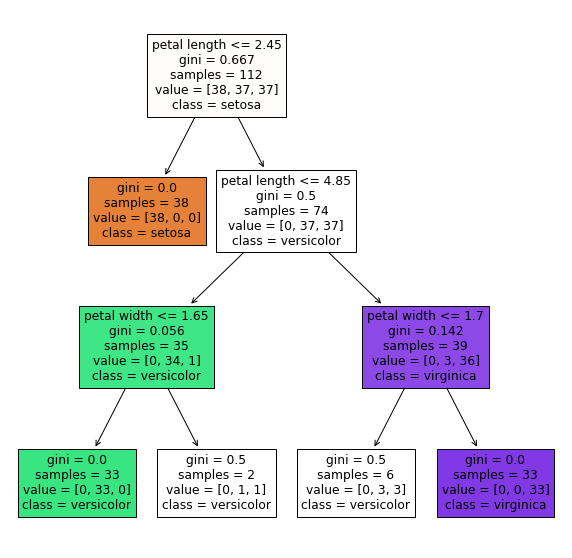

In [101]:
# MV: Usando impureza de Gini para medir la calidad de un split, decidiendo en base a la mejor opción
# con una profundidad máxima de 3
clf = tree.DecisionTreeClassifier(criterion="gini",
                                 splitter="best",
                                 max_depth=3)
clf = clf.fit(X_train, y_train)
print("Train Score: {}".format(clf.score(X_train,y_train)))
print("Test Score: {}".format(clf.score(X_test,y_test)))
plt.figure(figsize=[10,10])
# Disponible en la versión 0.21.3 de sklearn
out=tree.plot_tree(clf,
                   max_depth=20,
                   feature_names=["sepal length","sepal width","petal length","petal width"],
                   class_names=iris["target_names"],
                   filled=True,
                   impurity=True,
                   proportion=False)


## Feature importance

Es una medida de cuánto ayuda a reducir la impureza cada uno de los features utilizados. Se utiliza para hacer selección de features.
Se calcula de la siguiente forma:

para cada nodo $j$ se calcula la importancia del nodo ($ni$):

$$ ni_j=w_j * C_j-w_{left_j} * C_{left_j} - w_{right_j} * C_{right_j} $$

Donde:

$ni_j$: Importancia del nodo $j$  
$w_j$: Proporción de las muestras que caen en el nodo $j$  
$C_j$: Impureza del nodo $j$  
$left_j$: hijo izquierdo del nodo $j$  
$right_j$: hijo derecho del nodo $j$

una vez calculados los $ni_j$ para cada nodo se calcula el feature importance para el feature $i$ de la siguiente manera:

$$fi_i=\frac{\sum_{j \in \text{nodos en los que se usa i para hacer el split}}{ni_j}}{\sum_{j \in \text{todos los nodos}}{ni_j}}$$

In [102]:
# MV: Esta es la importancia del nodo 1 -> 74/112 = 0.661 que está anotado en el árbol pw debe ser por petal_width
# Lo que está haciendo en estas celdas en calcular el fi a mano y después compararlo con lo que da en SKLearn
pw_1=0.667-0.5*74/112
print(pw_1)

0.3366428571428572


In [103]:
 
pl_1=0.142*39/112-4/112*0.375


In [104]:
pl_2=0.056*35/112-2/112*0.5

In [105]:
pw_2=0.5*74/112-(39/112*0.142+35/112*0.056)

In [106]:
fi_pw=pw_1+pw_2
fi_pl=pl_1+pl_2

In [107]:
fi_pw/(fi_pw+fi_pl)

0.9307794582017617

In [108]:
fi_pl/(fi_pw+fi_pl)

0.06922054179823829

In [109]:
'''
MV: Yo lo voy a calcular a mi manera
ni_1 es node importance del nodo 1
Cuento los nodos de arriba hacia abajo, de izquierda a derecha
Ojo con esto: Usando los % que vinieron en el árbol construido con Proportion=true, 
los parámetros no me dan muy bien por la aproximación, construí estos contadores de abajo. 
Pero con un árbol grande hay que concantenar cada vez más, así que 
puse Proportion=False y usé los números de samples que se muestran en cada nodo 
en lugar del %
Estos son los contadores que había usado: 
muestras_nodo_3 = np.count_nonzero(X_train[:,3]<=4.85)/len(X_train)
muestras_nodo_4 = np.count_nonzero(np.logical_and(X_train[:,3]<=4.85,X_train[:,2]<=1.65))/len(X_train)

''' 

ni_1 = (1.0 * 0.667) - (0.5 * 74/112) # petal_width
ni_3 = (0.5 * 74/112) - (0.056 * 35/112) - (0.142 *39/112) # petal_length
ni_4 = (0.056 * 35/112) - (0.5 * 2/112) # petal_width
ni_5 = (0.142 *39/112) - (0.5 * 6/112) # petal width

petal_length_fi =(ni_1 + ni_3)/(ni_1 + ni_3 + ni_4 + ni_5)
petal_width_fi = (ni_4 + ni_5)/(ni_1 + ni_3 + ni_4 + ni_5)


print(petal_length_fi)
print(petal_width_fi)

# feature_names=["sepal length","sepal width","petal length","petal width"]

0.9505261371350985
0.04947386286490155


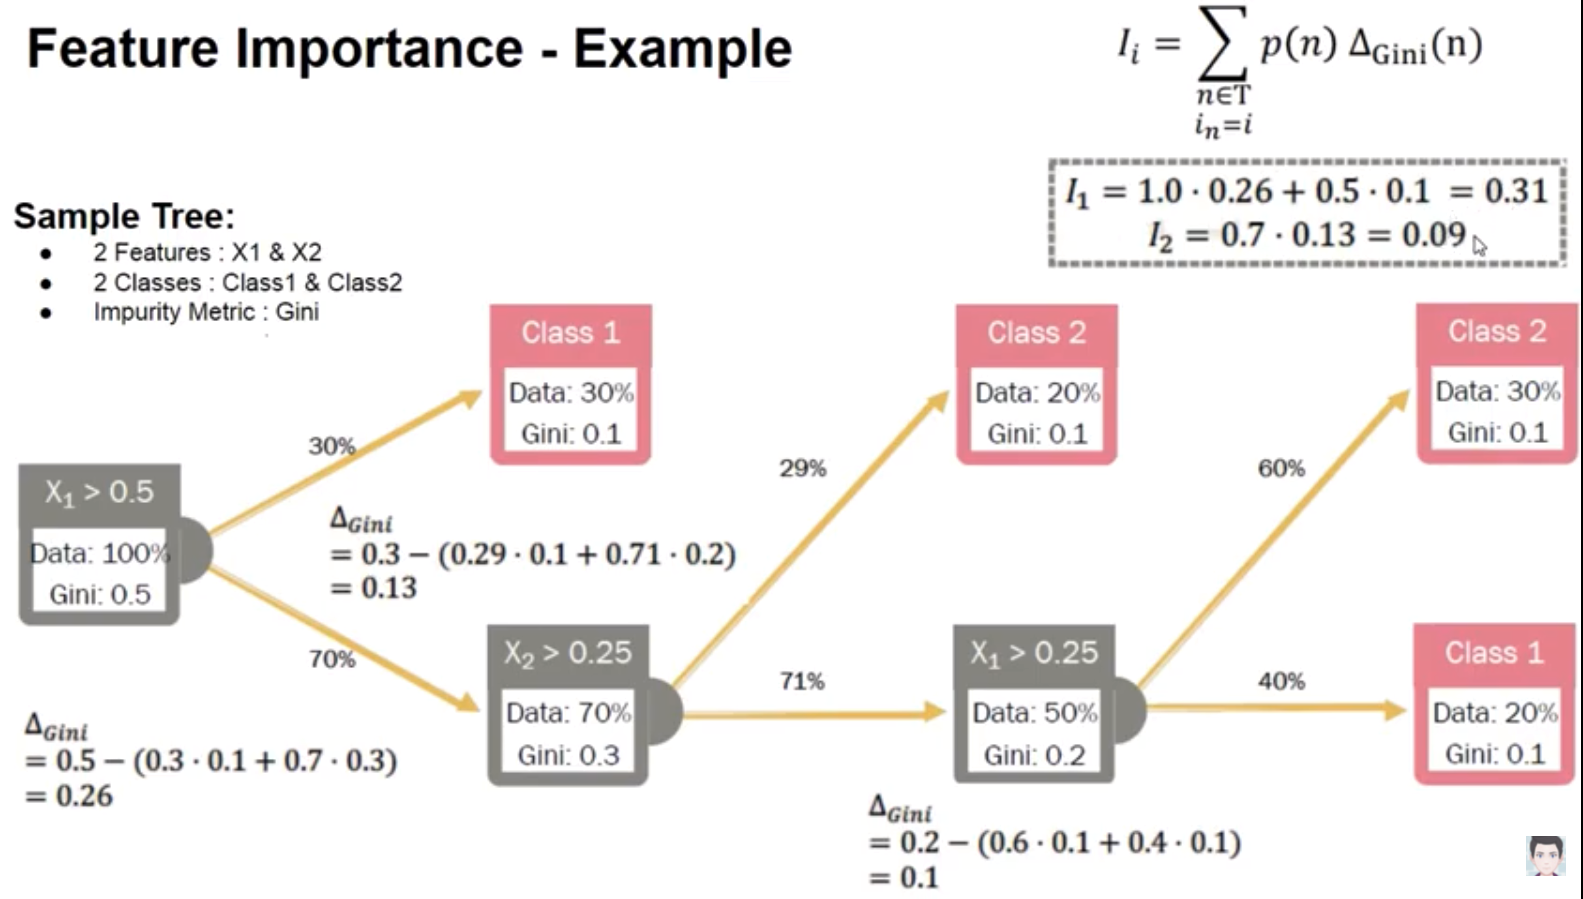

In [112]:
'''
De otro modo. Éste tomado de: https://www.youtube.com/watch?v=qC3PRqHqnfE
(Ver la imagen de arriba)
Se basa en el cálculo de Delta Gini = Gini del Nodo Padre - Suma(Proporción muestras nodo hijo * Gini nodo hijo)
Finalmente, para cada Nodo, se multiplica el Delta Gini por la proporción de muestras que cae en el nodo
(con respecto al número total de muestras)
Eso da el node importance, y el feature importance como antes es la suma del node importance de los nodos donde 
se use el feature para slipear, dividido por la suma de la importancia de todos los nodos, para normalizar
En los dos casos me dio igual y coincidente con lo que da la herramienta SKLearn
'''

delta_gini_nodo_1 = 0.667 - (0.5 * 74 / 112)
delta_gini_nodo_3 = 0.5 - (0.056 * 35/74) - (0.142 * 39/74)
delta_gini_nodo_4 = 0.056 - (0.5 * 2 / 35)
delta_gini_nodo_5 = 0.142 - (0.5 * 6 / 39)

ni_nodo_1 = delta_gini_nodo_1 * 1 
ni_nodo_3 = delta_gini_nodo_3 * 74 / 112
ni_nodo_4 = delta_gini_nodo_4 * 35 / 112
ni_nodo_5 = delta_gini_nodo_5 * 39 / 112

fi_petal_length = (ni_nodo_1 + ni_nodo_3)/(ni_nodo_1 + ni_nodo_3 + ni_nodo_4 + ni_nodo_5)
fi_petal_width = (ni_nodo_4 + ni_nodo_5)/(ni_nodo_1 + ni_nodo_3 + ni_nodo_4 + ni_nodo_5)

print(fi_petal_length)
print(fi_petal_width)

0.9505261371350985
0.049473862864901554


In [111]:
clf.feature_importances_

array([0.        , 0.        , 0.95073191, 0.04926809])

In [24]:
import numpy as np
'''
MV: Generación de Gaussianas usando multivariate_normal 
Esta es la signature de la función: random.multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)
Acá debajo N0, N1 es el número de muestras
mu0, mu1 son las medias
s un valor de covarianza a partir del cual construye una matriz

''' 
def generate_gaussians(N0,N1,mu0,mu1,s):
    # N1: Cantidad de personas
    sigma=[[s,0],[0,s]]
    np.random.seed(231)
    X=np.vstack([np.random.multivariate_normal(mu0, sigma,N0),np.random.multivariate_normal(mu1, sigma,N1)])
    y=np.hstack([np.zeros(N0),np.ones(N1)])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)
    return X_train, X_test, y_train, y_test


In [27]:
X_train, X_test, y_train, y_test=generate_gaussians(N0=1000,N1=1000,mu0=[2,5],mu1=[3,3],s=2)
print(X_train)
print(y_train)

[[ 0.90497598  4.40586364]
 [ 4.33761185  5.14265226]
 [ 4.08938185  2.38209853]
 ...
 [ 2.90207423  3.45753845]
 [-0.9146425   2.85450876]
 [ 2.90655607  3.93444909]]
[0. 0. 1. ... 0. 1. 1.]


Train Score: 0.8365671641791045
Test Score: 0.7742424242424243


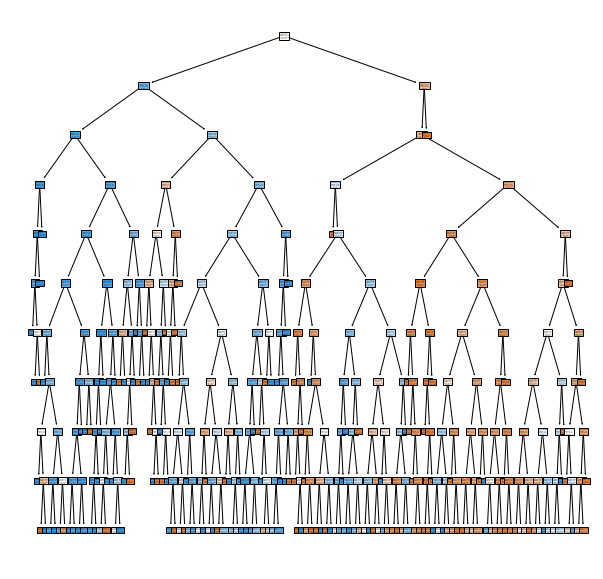

In [120]:
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                 splitter="random",
                                 max_depth=10)
clf = clf.fit(X_train, y_train)
print("Train Score: {}".format(clf.score(X_train,y_train)))
print("Test Score: {}".format(clf.score(X_test,y_test)))
plt.figure(figsize=[10,10])
# Disponible en la versión 0.21.3 de sklearn
out=tree.plot_tree(clf,
                   max_depth=20,
                   feature_names=["X1","X2"],
                   class_names=["0","1"],
                   filled=True,
                   impurity=True,
                   proportion=False)

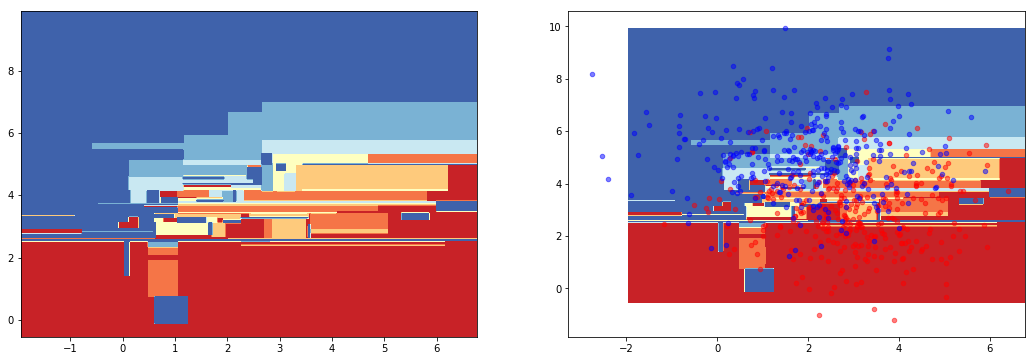

In [121]:
helper_DT.plotBoundaryDT(X_train,y_train,X_test,y_test,clf,N=500)

Si bien un árbol de decisión no es el clasificador óptimo para un dataset generado con gaussianas, veamos qué hiperparámetros podemos modificar para mejorar la regularización.

In [122]:
X_train, X_test, y_train, y_test=generate_gaussians(N0=5000,N1=5000,mu0=[2,5],mu1=[3,3],s=2)

In [123]:
def gen_tree(X_train, y_train, X_test, y_test,
             criterion="entropy",
             splitter="best",
             max_depth=None, 
             min_samples_split=2,
             min_samples_leaf=1,
             min_weight_fraction_leaf=0.,
             max_features=None,
             max_leaf_nodes=None,
             min_impurity_decrease=0.,
             plot_tree=False):
    clf = tree.DecisionTreeClassifier(criterion=criterion,
                                     splitter=splitter,
                                     max_depth=max_depth,
                                     min_samples_split=min_samples_split,
                                     min_samples_leaf=min_samples_leaf,
                                     min_weight_fraction_leaf=min_weight_fraction_leaf,
                                     max_features=max_features,
                                     max_leaf_nodes=max_leaf_nodes,
                                     min_impurity_decrease=min_impurity_decrease
                                     )
    clf = clf.fit(X_train, y_train)
    print("Train Score: {}".format(clf.score(X_train,y_train)))
    print("Test Score: {}".format(clf.score(X_test,y_test)))
    helper_DT.plotBoundaryDT(X_train,y_train,X_test,y_test,clf,N=500)
    if plot_tree:
        plt.figure(figsize=[10,10])
        # Disponible en la versión 0.21.3 de sklearn
        out=tree.plot_tree(clf,
                           max_depth=20,
                           feature_names=["X1","X2"],
                           class_names=["0","1"],
                           filled=True,
                           impurity=True,
                           proportion=False)

Train Score: 1.0
Test Score: 0.6987878787878787


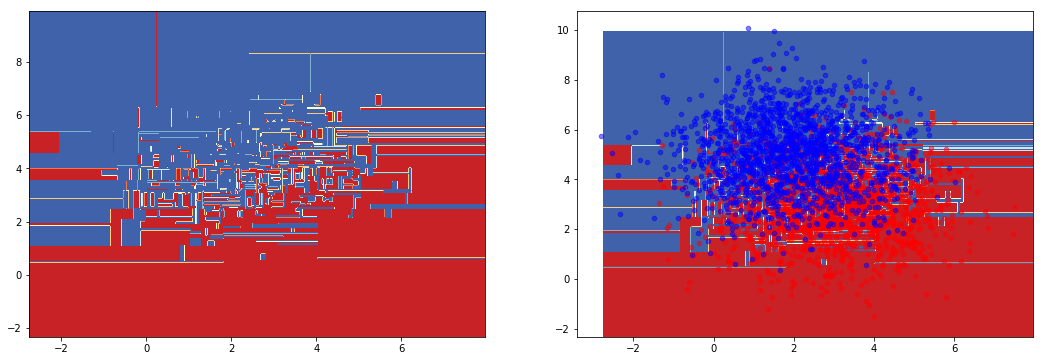

In [124]:
gen_tree(X_train, y_train, X_test, y_test,
             criterion="entropy",
             splitter="best",
             max_depth=None, 
             min_samples_split=2,
             min_samples_leaf=1,
             min_weight_fraction_leaf=0.,
             max_features=None,
             max_leaf_nodes=None,
             min_impurity_decrease=0.,
             plot_tree=False)

# Comparación con QDA

In [125]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_QDA = QuadraticDiscriminantAnalysis()
clf_QDA.fit(X_train, y_train)
print("Train Score: {}".format(clf_QDA.score(X_train,y_train)))
print("Test Score: {}".format(clf_QDA.score(X_test,y_test)))

Train Score: 0.7756716417910448
Test Score: 0.7809090909090909


In [126]:
#Búsqueda de hiperparámetros
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['entropy', 'gini'], 
              'splitter': ['best', 'random'],
              'max_depth': [None, 30, 20, 10],
              'min_samples_split':[2,4,8],
              'min_samples_leaf':[1,2,4,8],
              'min_weight_fraction_leaf':[0.,0.01, 0.02],
              'max_features':[None,1],
              'max_leaf_nodes':[None,50,100],
              'min_impurity_decrease':[0.,0.05,0.1] 
            }
trees= tree.DecisionTreeClassifier()
clf = GridSearchCV(trees, param_grid, cv=4,verbose=1,n_jobs=-1)
clf.fit(X_train,y_train)

Fitting 4 folds for each of 10368 candidates, totalling 41472 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1270 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 5988 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 15788 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 28388 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 41472 out of 41472 | elapsed:   32.9s finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n...
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [None, 30, 20, 10],
                         'm

In [127]:
import pandas as pd
df=pd.DataFrame(clf.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_impurity_decrease,param_min_samples_leaf,...,param_min_weight_fraction_leaf,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.084913,0.031703,0.001130,0.000096,entropy,None,None,None,0,1,...,0,best,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.699881,0.681384,0.709677,0.677419,0.692090,0.013225,5119
1,0.006430,0.000548,0.001181,0.000123,entropy,None,None,None,0,1,...,0,random,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.685561,0.659308,0.680406,0.690562,0.678955,0.011902,5273
2,0.029729,0.011245,0.000853,0.000077,entropy,None,None,None,0,1,...,0.01,best,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.754177,0.761933,0.783751,0.777778,0.769403,0.011871,499
3,0.002032,0.000080,0.000832,0.000031,entropy,None,None,None,0,1,...,0.01,random,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.753580,0.766706,0.765830,0.779570,0.766418,0.009195,963
4,0.015799,0.000325,0.000850,0.000021,entropy,None,None,None,0,1,...,0.02,best,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.758353,0.770286,0.797491,0.784349,0.777612,0.014706,4


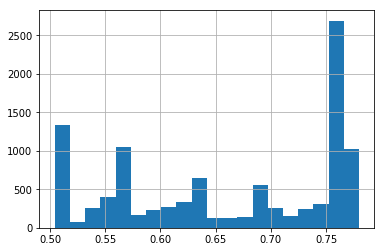

In [134]:
df["mean_test_score"].hist(bins=20)

In [129]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 1,
 'max_leaf_nodes': 100,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 8,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.02,
 'splitter': 'best'}

In [130]:
clf.best_estimator_.score(X_test,y_test)

0.7684848484848484

Train Score: 0.7794029850746269
Test Score: 0.7693939393939394


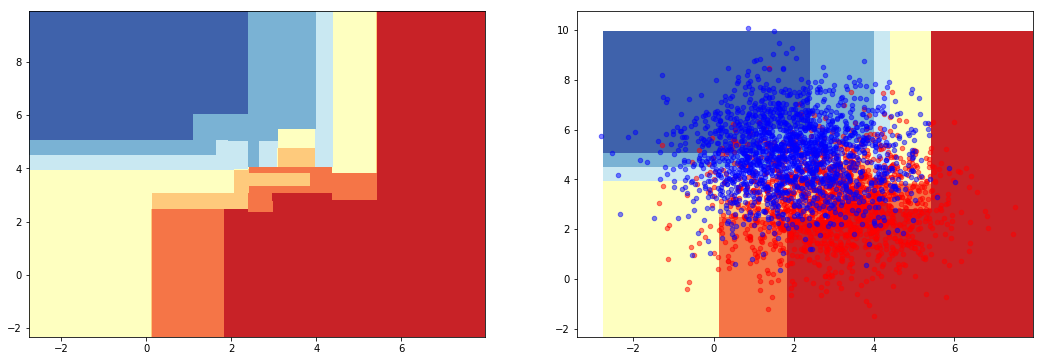

In [133]:
gen_tree(X_train, y_train, X_test, y_test,
             criterion="gini",
             splitter="best",
             max_depth=20, 
             min_samples_split=4,
             min_samples_leaf=8,
             min_weight_fraction_leaf=0.02,
             max_features=1,
             max_leaf_nodes=100,
             min_impurity_decrease=0.,
             plot_tree=False)